*Importing Necessary Libbraries*

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

warnings.filterwarnings('ignore') # for ignoring warnings to keep the notebook clean (relevant issues are handled in later sections)

*Loading Dataset*

In [ ]:
df=pd.read_csv('heart_diesease.csv')
df

,age,sex,chest_pain_type,rest_blood_press,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exer_ind_angina,st_depression,st_slope,num_major_vessels,thallium_scint,ca_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


*Data Preprocessing*

In [ ]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_blood_press', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exer_ind_angina',
       'st_depression', 'st_slope', 'num_major_vessels', 'thallium_scint',
       'ca_disease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   rest_blood_press     303 non-null    int64  
 4   cholesterol          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   max_heart_rate       303 non-null    int64  
 8   exer_ind_angina      303 non-null    int64  
 9   st_depression        303 non-null    float64
 10  st_slope             303 non-null    int64  
 11  num_major_vessels    303 non-null    object 
 12  thallium_scint       303 non-null    object 
 13  ca_disease           303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
df.describe()

,age,sex,chest_pain_type,rest_blood_press,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exer_ind_angina,st_depression,st_slope,ca_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
rest_blood_press       0
cholesterol            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exer_ind_angina        0
st_depression          0
st_slope               0
num_major_vessels      0
thallium_scint         0
ca_disease             0
dtype: int64

*Checking For Duplicates*

In [ ]:
df.duplicated().sum()

0

*Value Counts*

In [ ]:
df['num_major_vessels'].value_counts()
df['thallium_scint'].value_counts()
print(df['num_major_vessels'])
print(df['thallium_scint'])

0      0
1      3
2      2
3      0
4      0
      ..
298    0
299    2
300    1
301    1
302    ?
Name: num_major_vessels, Length: 303, dtype: object
0      6
1      3
2      7
3      3
4      3
      ..
298    7
299    7
300    7
301    3
302    3
Name: thallium_scint, Length: 303, dtype: object


*Label Encoding*

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Encoding 'Label' column 
df['num_major_vessels'] = label_encoder.fit_transform(df['num_major_vessels'])
df['thallium_scint'] = label_encoder.fit_transform(df['thallium_scint'])
df['num_major_vessels']
df['thallium_scint']

0      1
1      0
2      2
3      0
4      0
      ..
298    2
299    2
300    2
301    0
302    0
Name: thallium_scint, Length: 303, dtype: int32

In [ ]:
df['num_major_vessels'].value_counts()
df['thallium_scint'].value_counts()
print(df['num_major_vessels'])
print(df['thallium_scint'])

0      0
1      3
2      2
3      0
4      0
      ..
298    0
299    2
300    1
301    1
302    4
Name: num_major_vessels, Length: 303, dtype: int32
0      1
1      0
2      2
3      0
4      0
      ..
298    2
299    2
300    2
301    0
302    0
Name: thallium_scint, Length: 303, dtype: int32


In [ ]:
from imblearn.over_sampling import SMOTE

# Define the target and features
X = df.drop('ca_disease', axis=1)
y = df['ca_disease']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(y_resampled.value_counts())


ca_disease
0    164
2    164
1    164
3    164
4    164
Name: count, dtype: int64


*EDA*


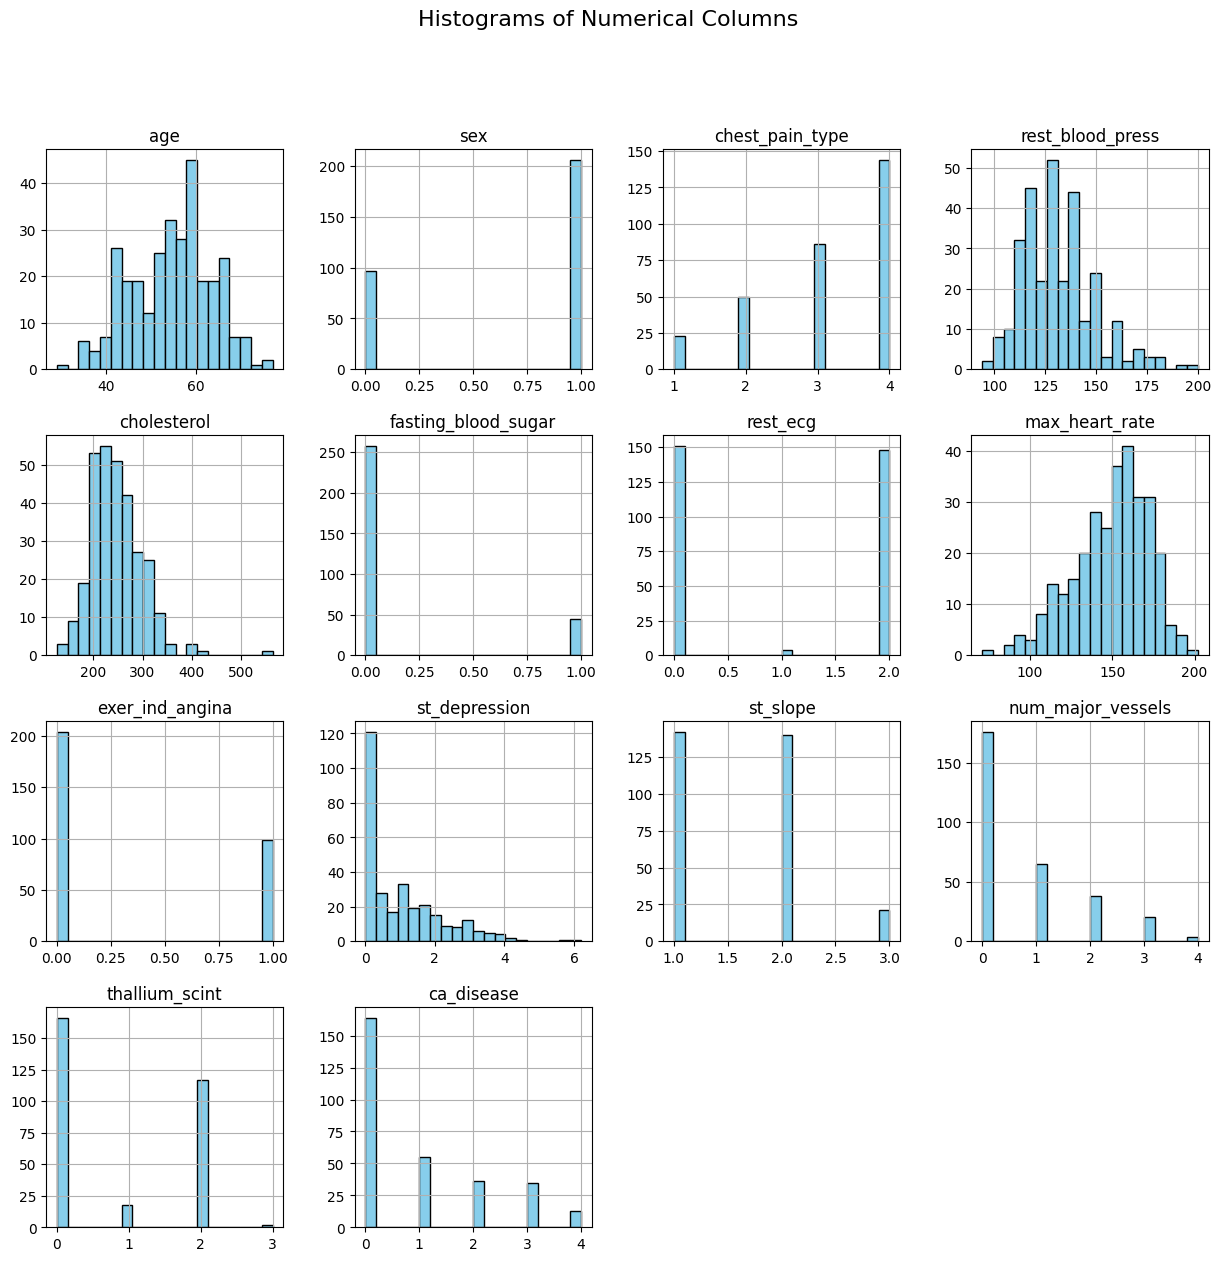

In [ ]:
# Plot histograms for Numerical columns
df.hist(figsize=(15, 14), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

*Checking For categorical Columns*

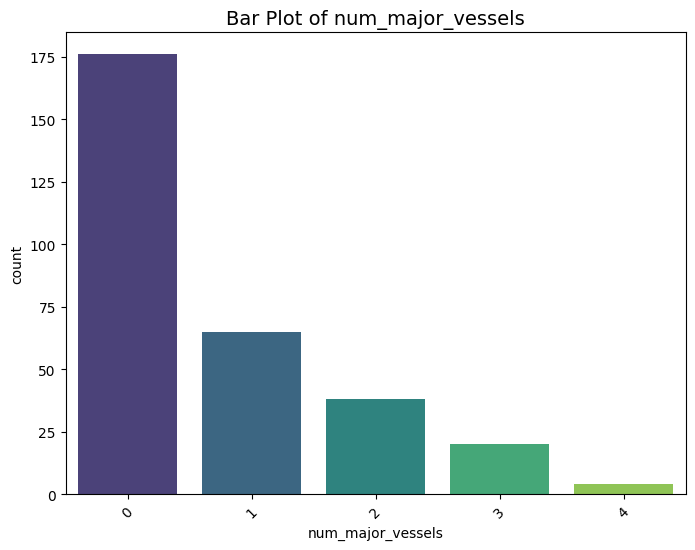

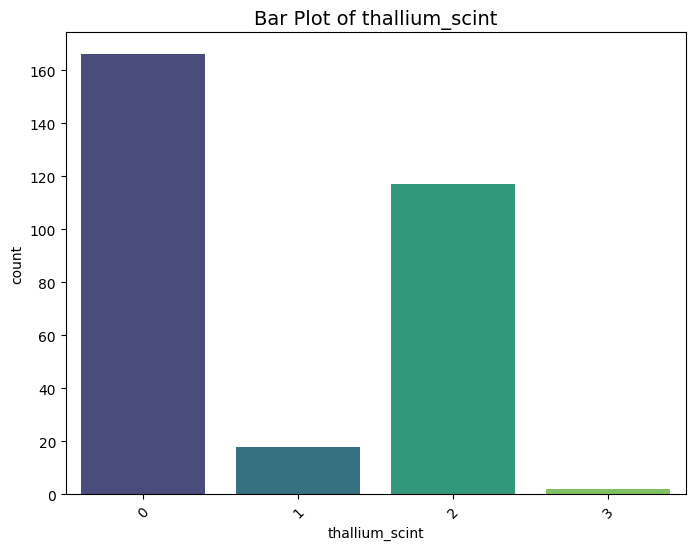

In [ ]:
# List of categorical columns (Replace with your actual categorical columns)
categorical_columns = ['num_major_vessels','thallium_scint']

# Plot bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Bar Plot of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

*Checking For Outliers In Numerical Columns*

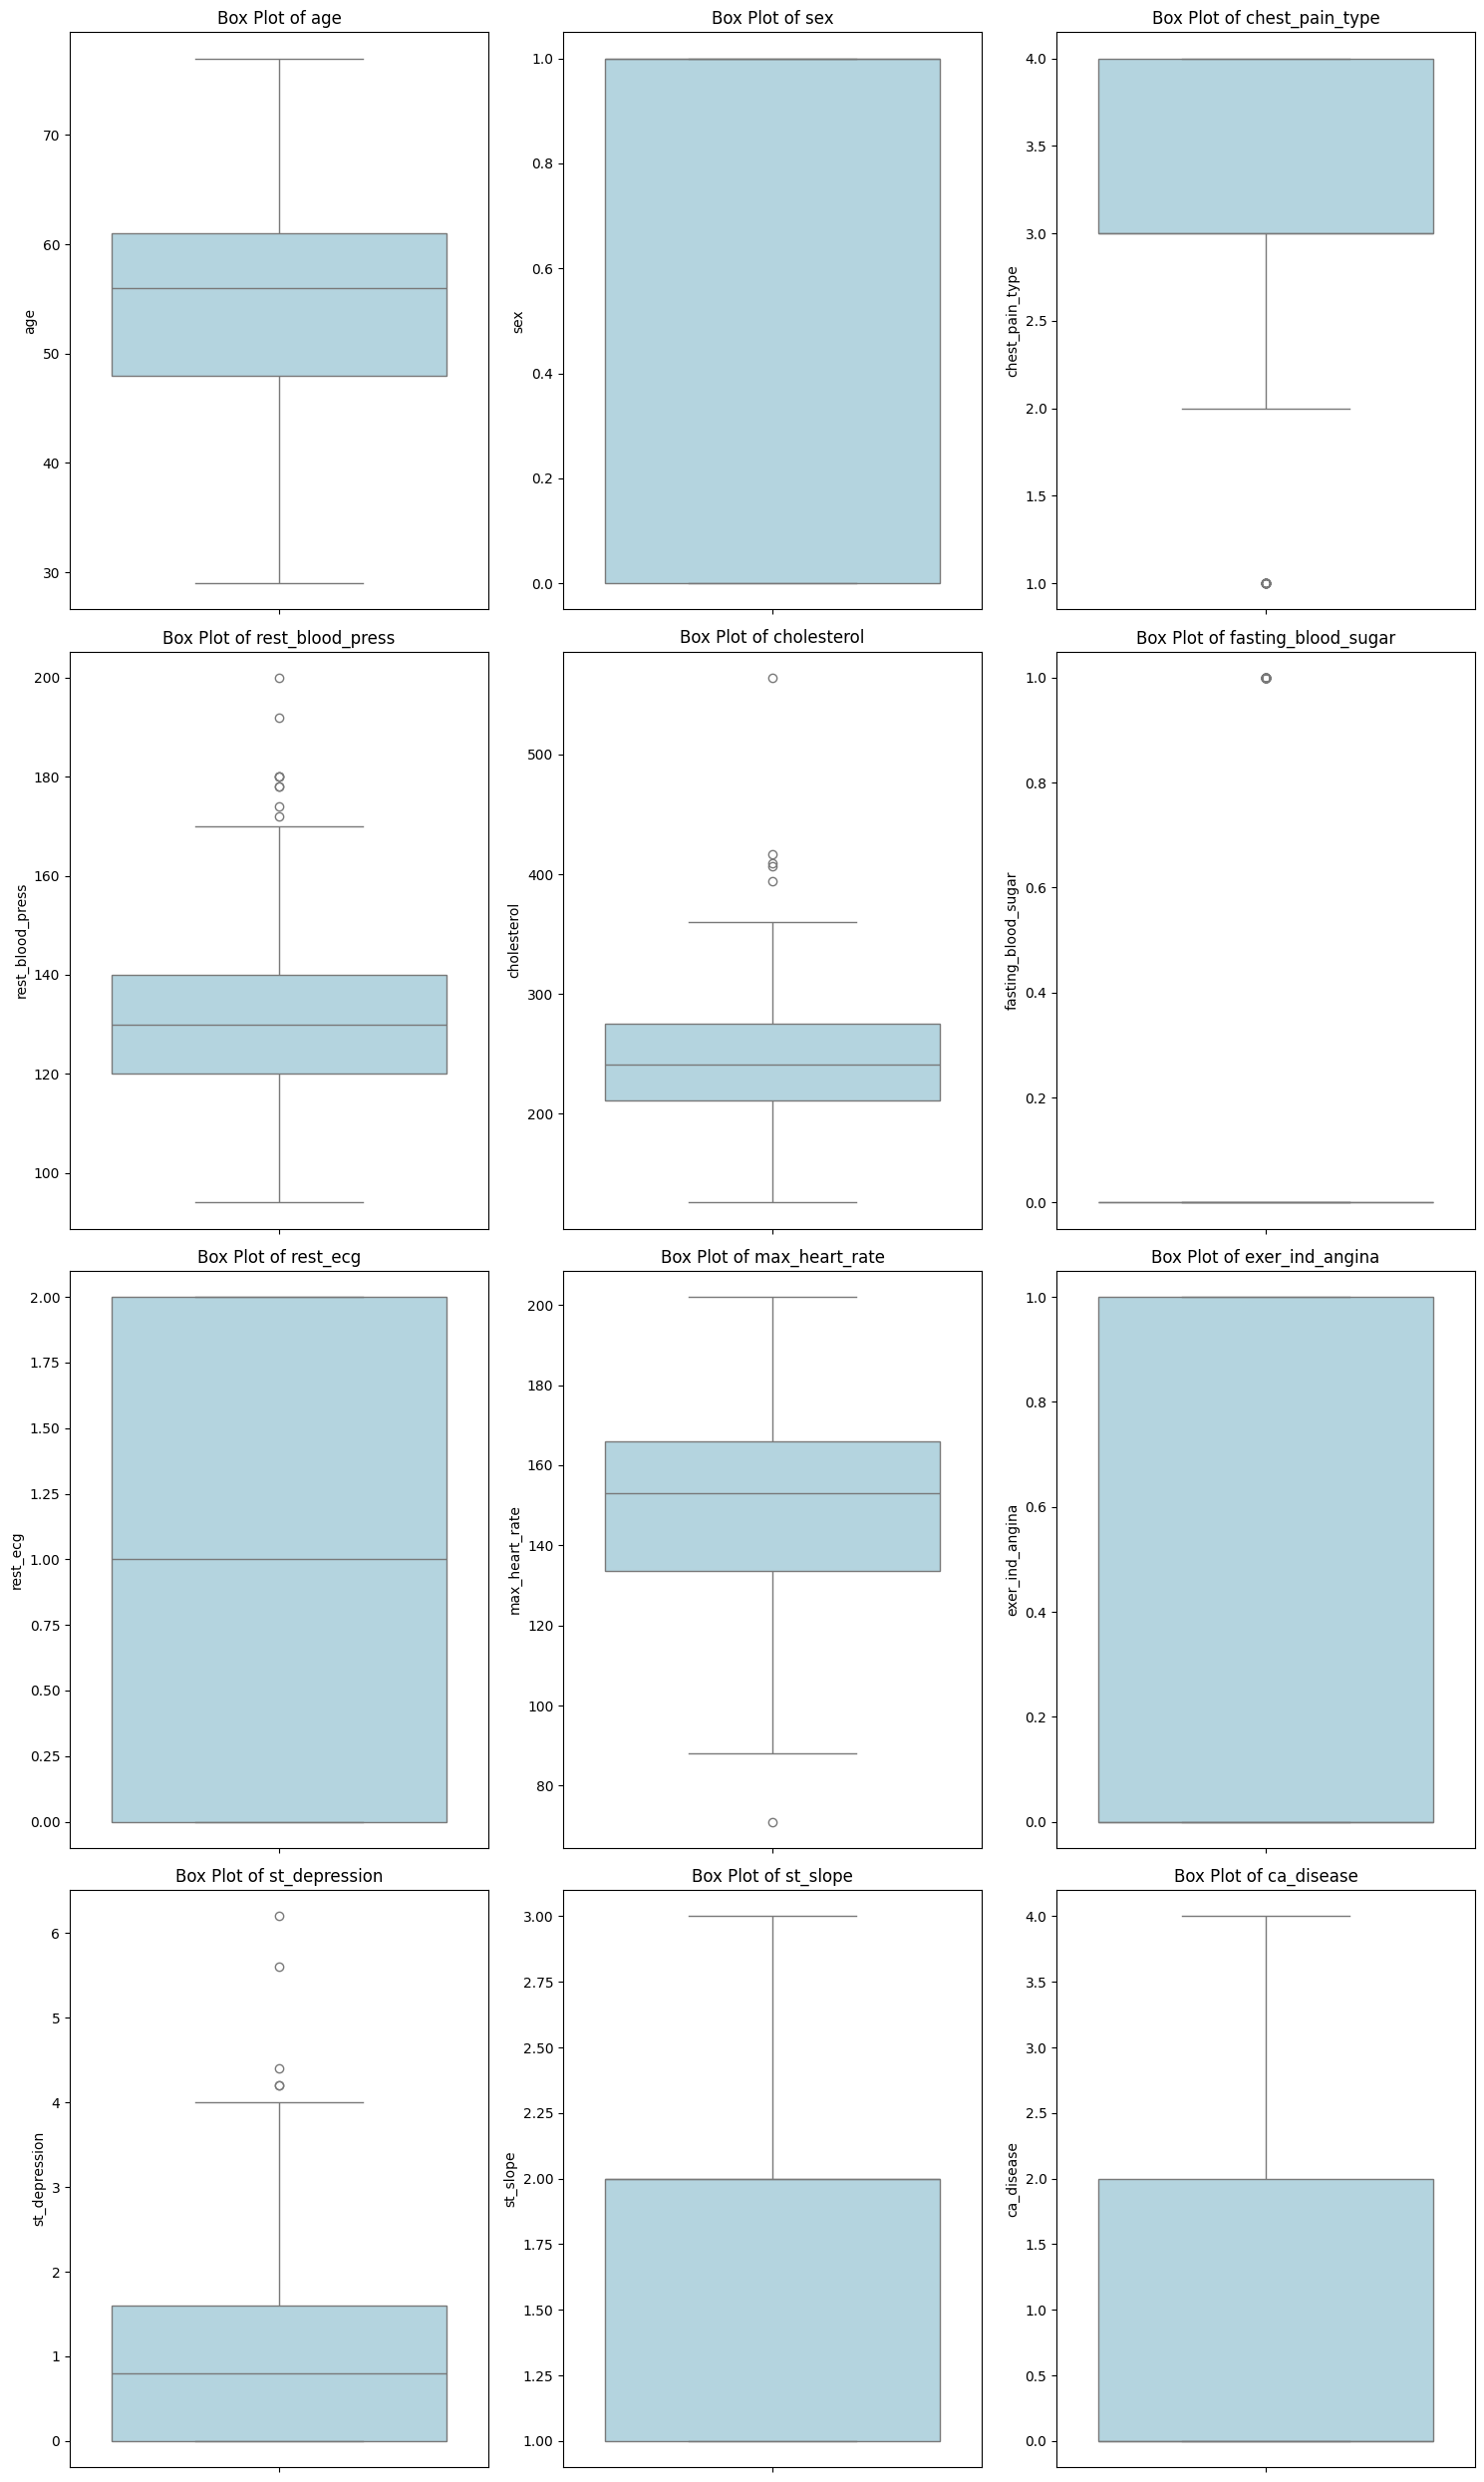

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['age','sex','chest_pain_type','rest_blood_press','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate','exer_ind_angina','st_depression','st_slope','ca_disease']

plt.figure(figsize=(15, (len(numerical_cols) // 3 + 1) * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
import numpy as np

# List of columns with outliers
outlier_cols = ['chest_pain_type', 'rest_blood_press', 'cholesterol', 'fasting_blood_sugar', 'max_heart_rate', 'st_depression']

# IQR-based capping for the specified columns
for col in outlier_cols:
    # Calculate the IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)  # 25th percentile (Q1)
    Q3 = df[col].quantile(0.75)  # 75th percentile (Q3)
    IQR = Q3 - Q1                # IQR

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Capping the outliers: values below the lower bound will be capped at the lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    
    # Capping the outliers: values above the upper bound will be capped at the upper bound
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Check the dataset after applying IQR-based capping
print(df[outlier_cols].describe())



       chest_pain_type  rest_blood_press  cholesterol  fasting_blood_sugar  \
count       303.000000        303.000000   303.000000                303.0   
mean          3.196370        131.346535   245.584158                  0.0   
std           0.880371         16.648749    47.558803                  0.0   
min           1.500000         94.000000   126.000000                  0.0   
25%           3.000000        120.000000   211.000000                  0.0   
50%           3.000000        130.000000   241.000000                  0.0   
75%           4.000000        140.000000   275.000000                  0.0   
max           4.000000        170.000000   371.000000                  0.0   

       max_heart_rate  st_depression  
count      303.000000     303.000000  
mean       149.652640       1.024422  
std         22.731735       1.110127  
min         84.750000       0.000000  
25%        133.500000       0.000000  
50%        153.000000       0.800000  
75%        166.000000   

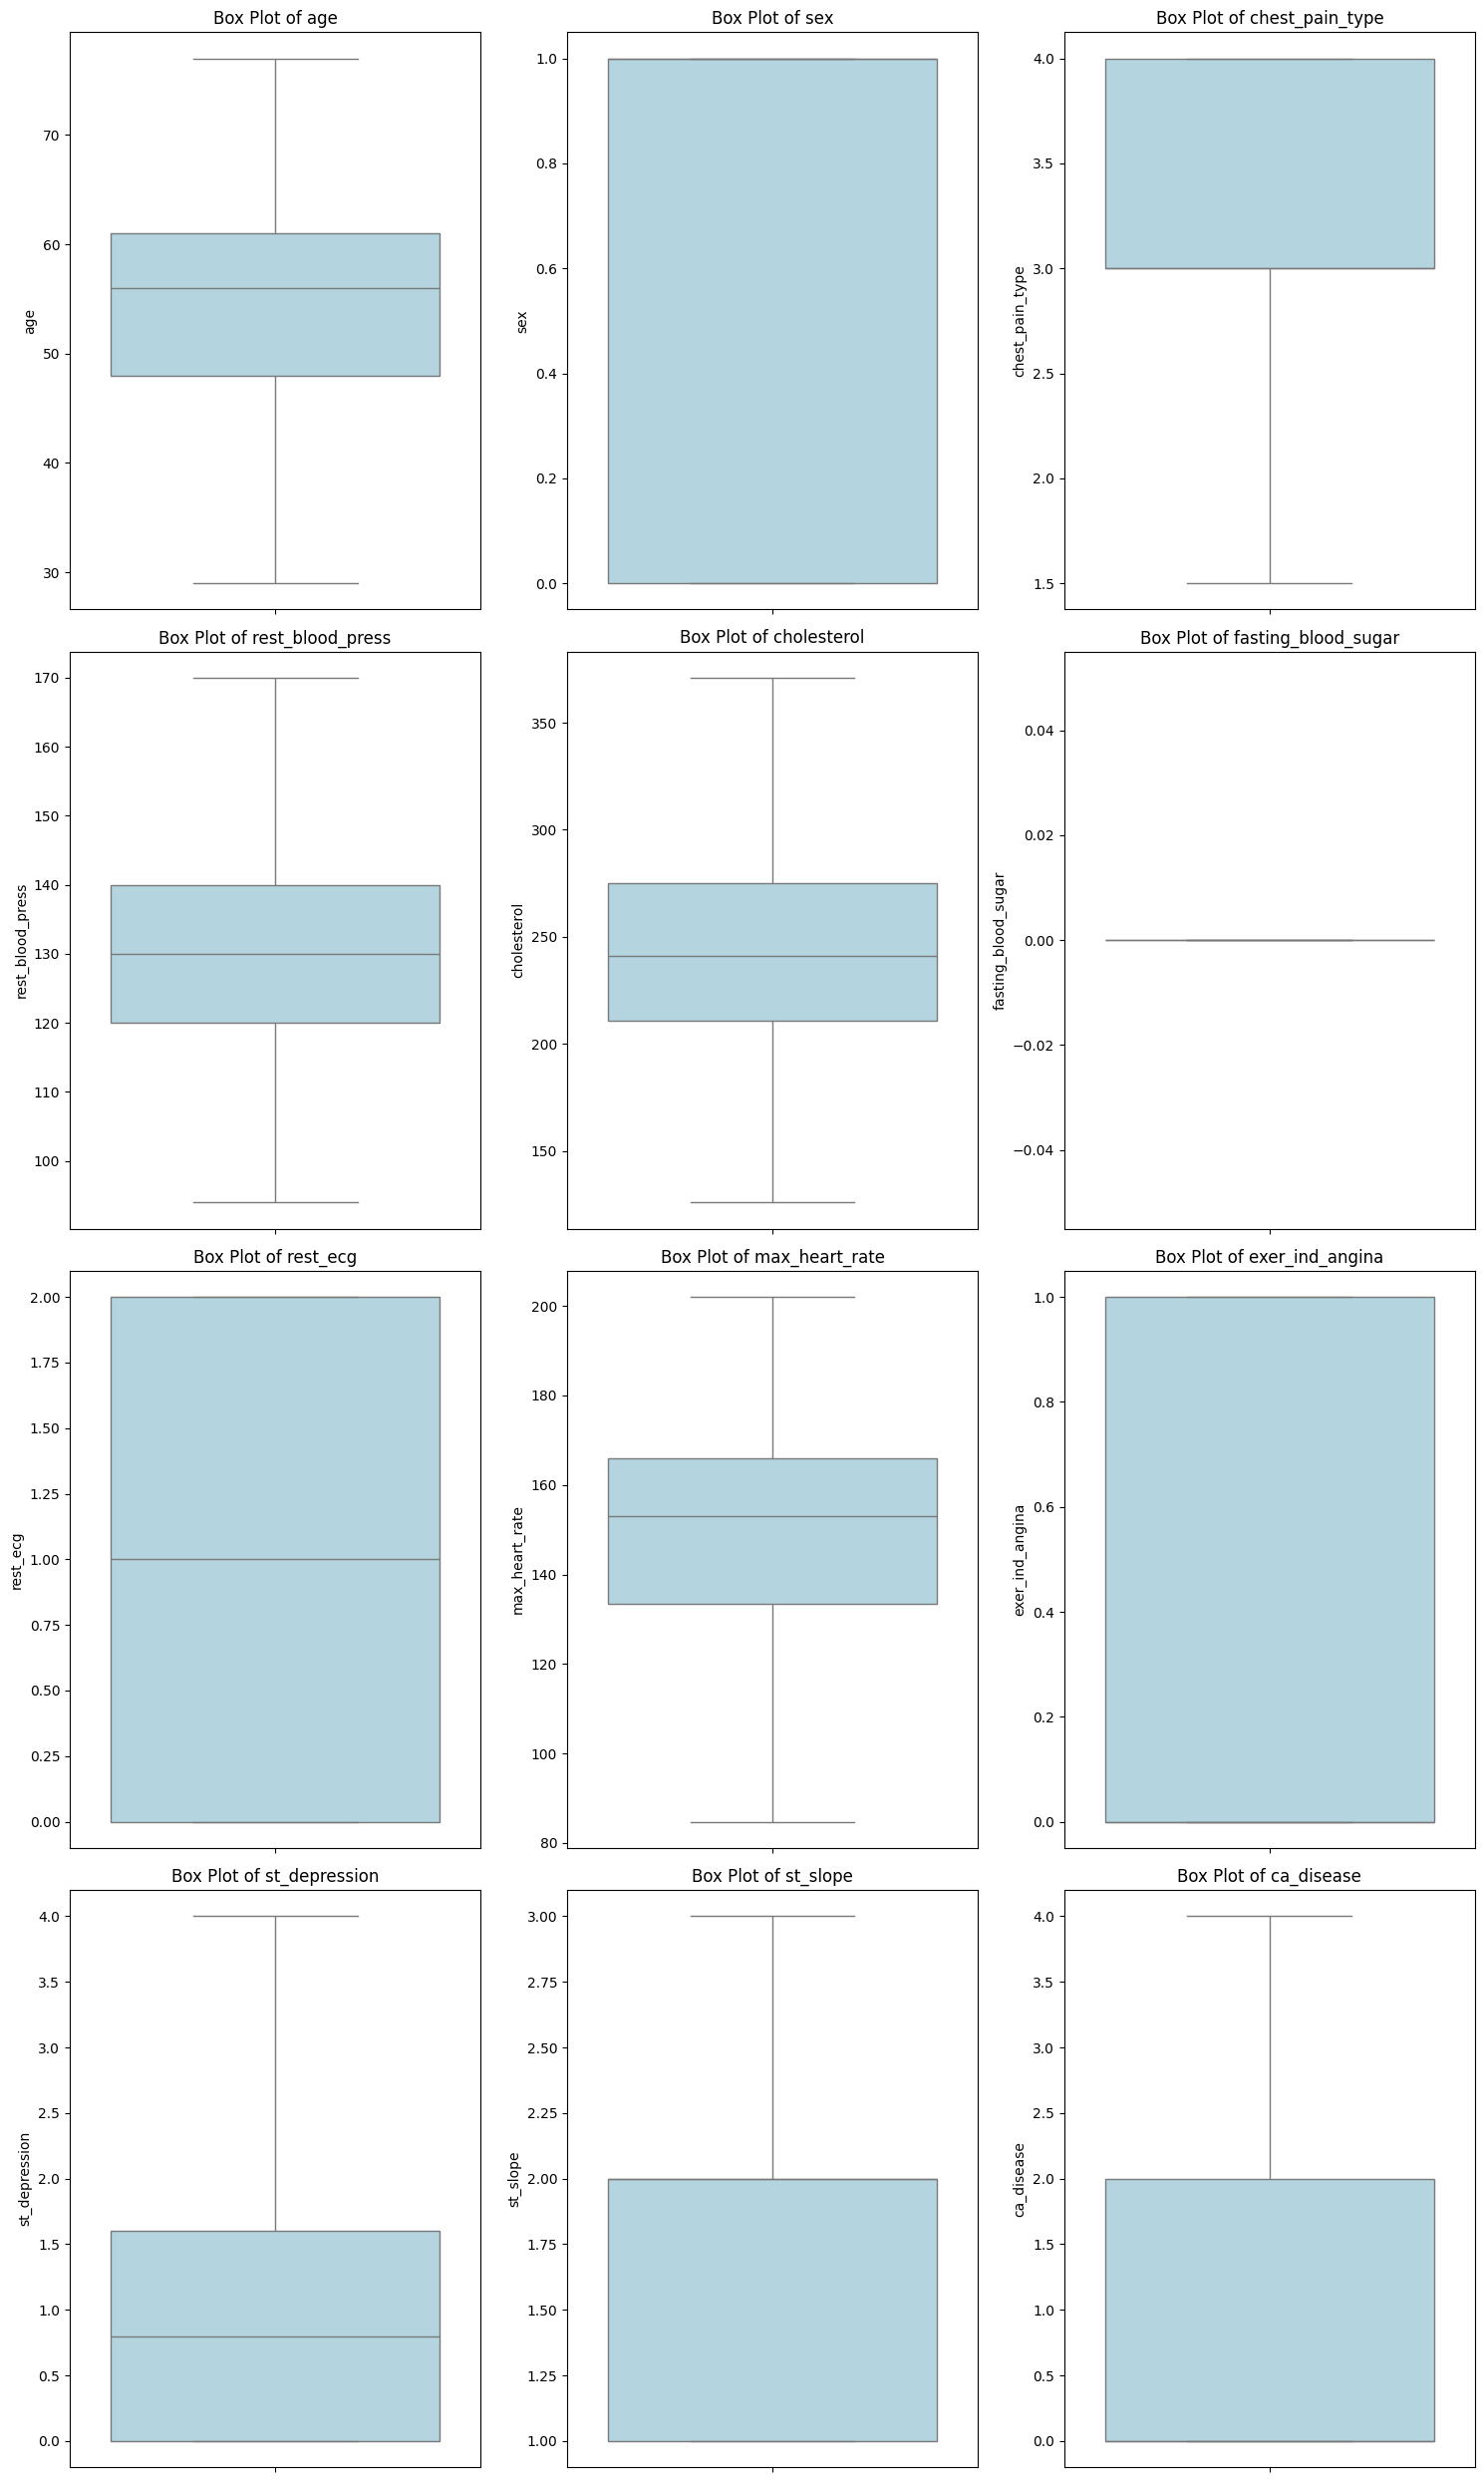

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['age','sex','chest_pain_type','rest_blood_press','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate','exer_ind_angina','st_depression','st_slope','ca_disease']

plt.figure(figsize=(15, (len(numerical_cols) // 3 + 1) * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

*Checking Outliers in Categorial columns*

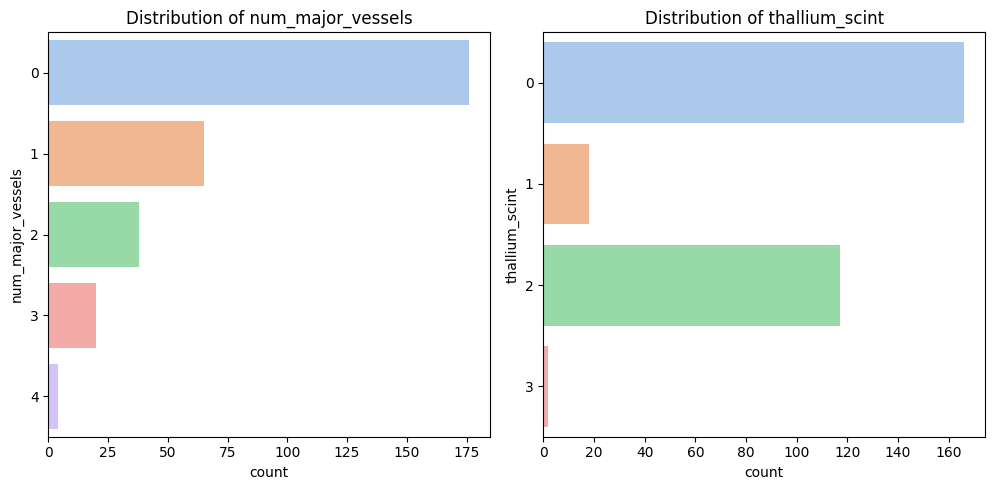

In [ ]:
# List of categorical columns
categorical_cols = ['num_major_vessels','thallium_scint']

plt.figure(figsize=(15, (len(categorical_cols) // 3 + 1) * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i + 1)
    sns.countplot(data=df, y=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
df.nunique()

age                     41
sex                      2
chest_pain_type          4
rest_blood_press        44
cholesterol            148
fasting_blood_sugar      1
rest_ecg                 3
max_heart_rate          91
exer_ind_angina          2
st_depression           36
st_slope                 3
num_major_vessels        5
thallium_scint           4
ca_disease               5
dtype: int64

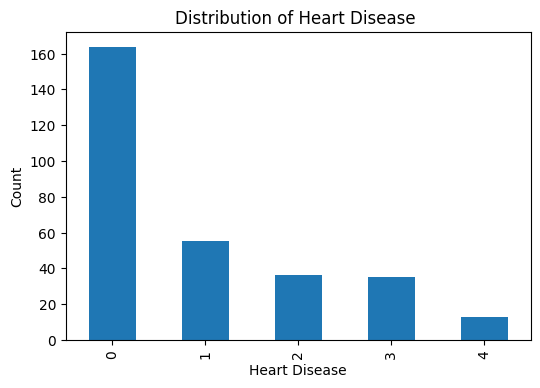

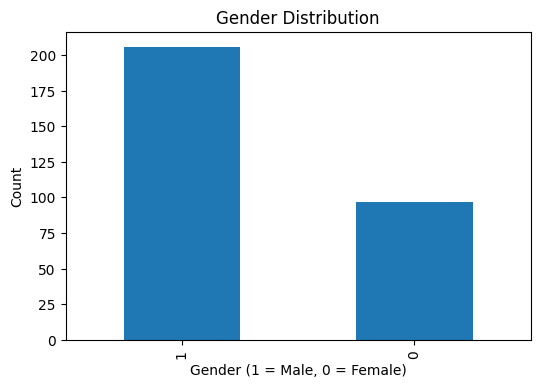

In [ ]:

# Target variable (binary) distribution
plt.figure(figsize=(6, 4))
df['ca_disease'].value_counts().plot(kind='bar', title='Distribution of Heart Disease ')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()



# Categorical features - Example: sex distribution
plt.figure(figsize=(6, 4))
df['sex'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.show()


*Bivariate Analysis*

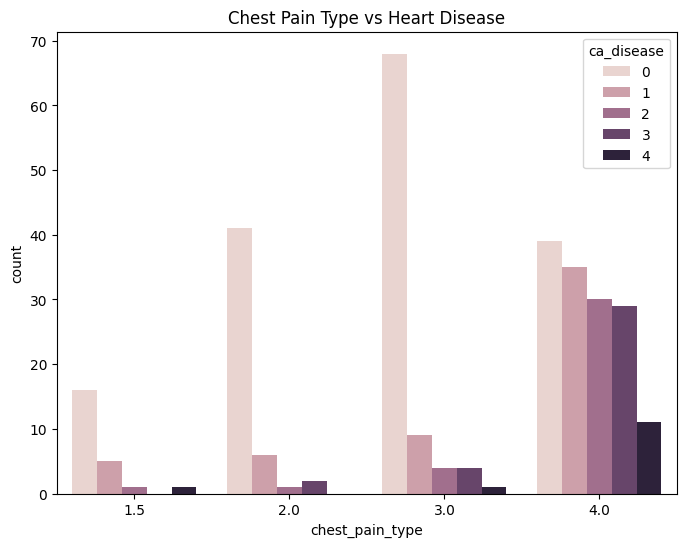

In [ ]:


# Countplot: Categorical vs Target (e.g., chest pain type vs heart disease)
plt.figure(figsize=(8, 6))
sns.countplot(x='chest_pain_type', hue='ca_disease', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()


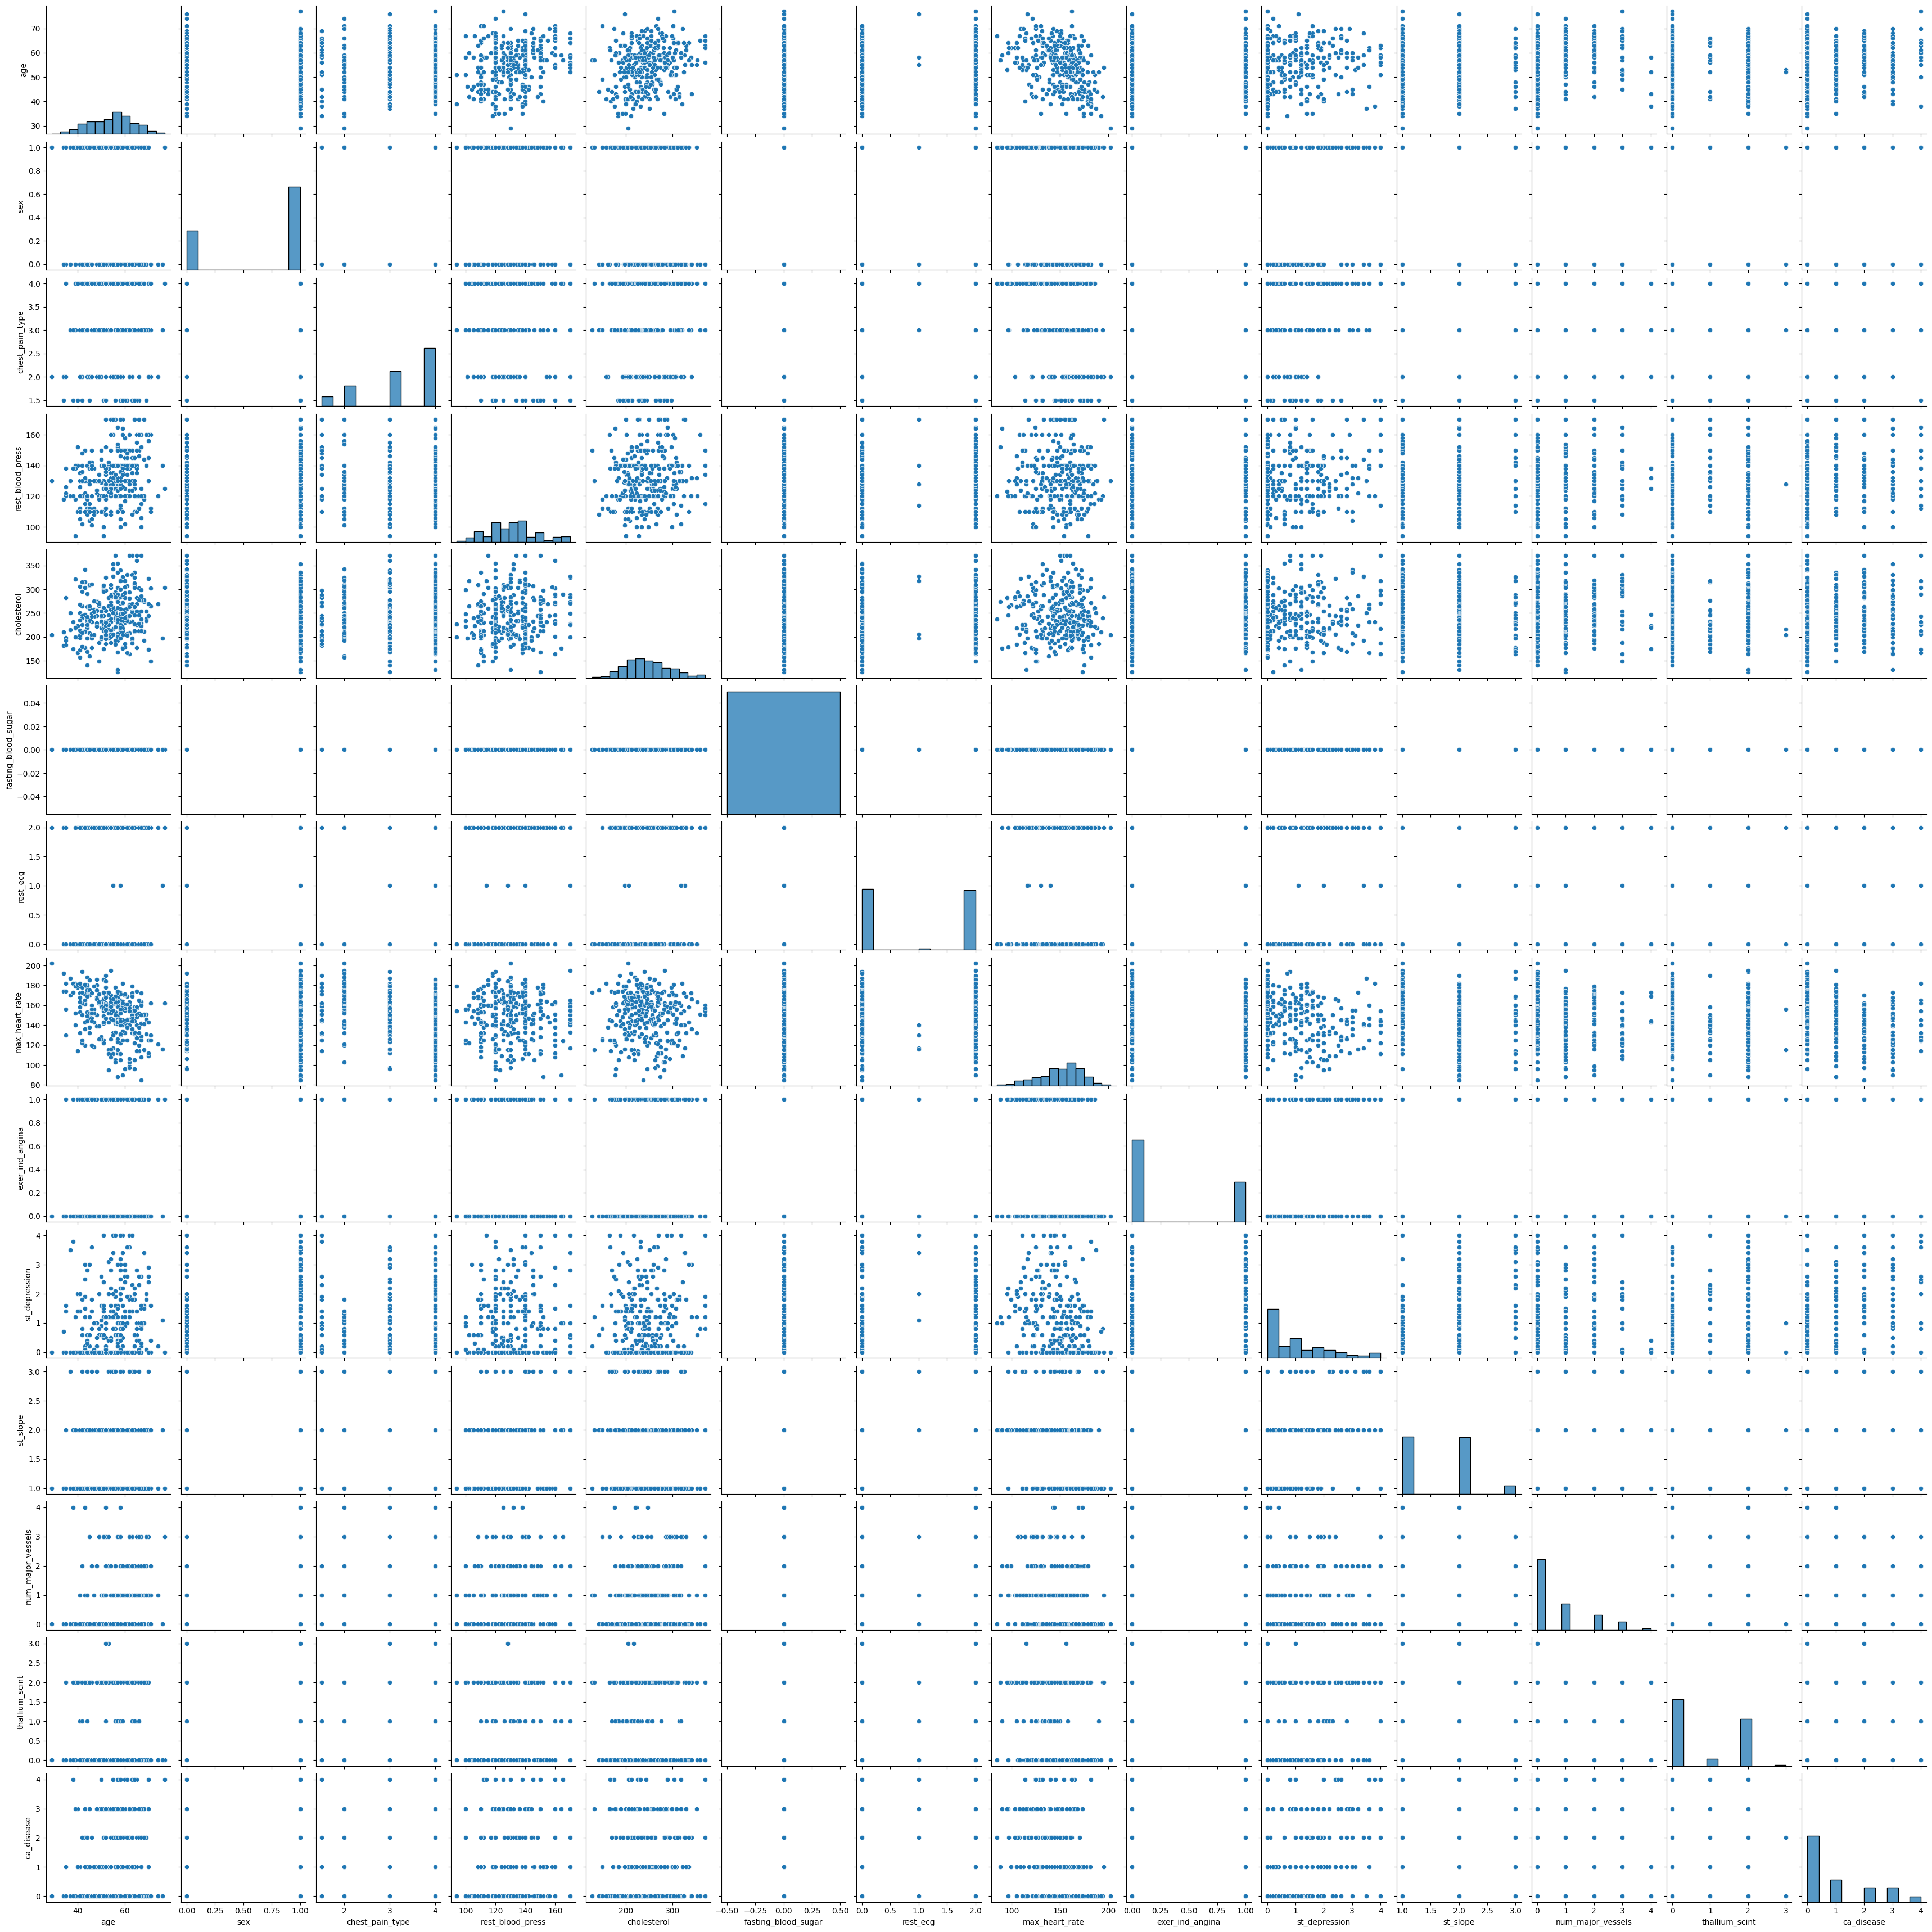

In [ ]:
sns.pairplot(df)

*Scatter Plot*

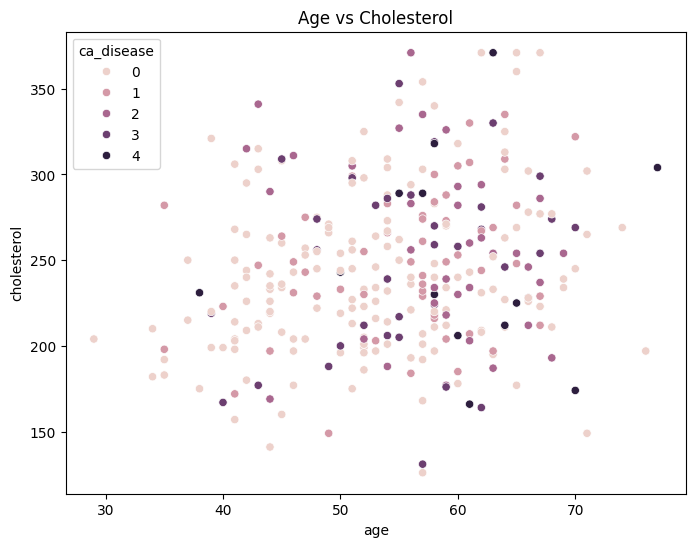

In [ ]:
# age vs cholesterol with hue as heart disease
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='cholesterol', hue='ca_disease', data=df)
plt.title('Age vs Cholesterol')
plt.show()

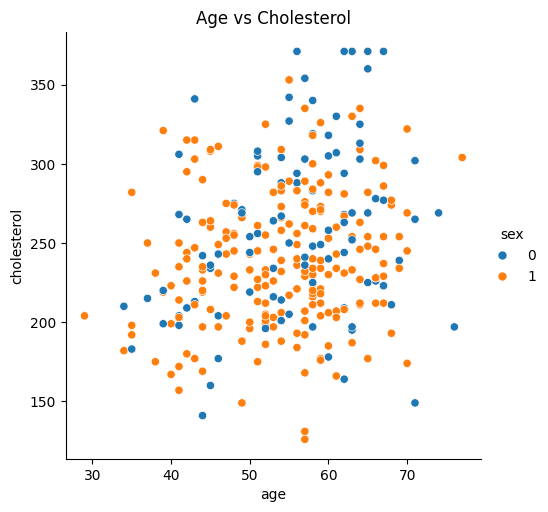

In [ ]:
# age vs cholesterol with hue as sex
sns.relplot(x='age',y='cholesterol',hue='sex',data=df)
plt.title('Age vs Cholesterol')
plt.show()

*Distribution*

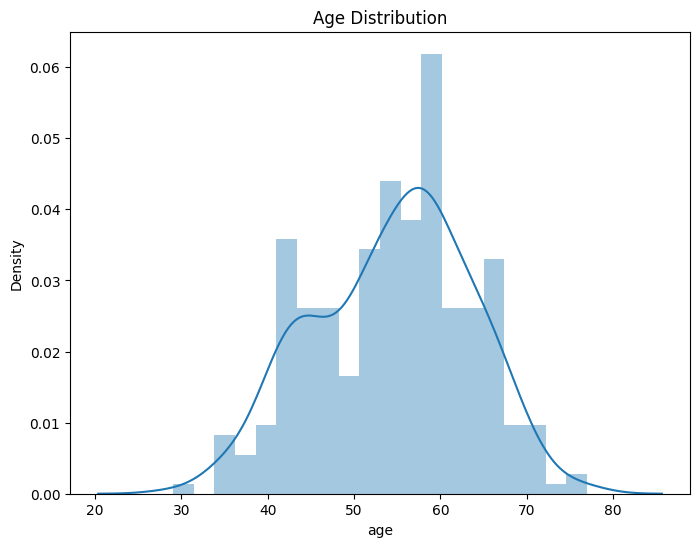

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df['age'],bins=20)
plt.title('Age Distribution')
plt.show()

*By seeing this we can say that most of the people's age lies in 60*

*Target Column Distribution*

In [ ]:
df['ca_disease'].unique()
df['ca_disease']

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: ca_disease, Length: 303, dtype: int64

In [ ]:
df['ca_disease'].value_counts()
df['ca_disease']

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: ca_disease, Length: 303, dtype: int64

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

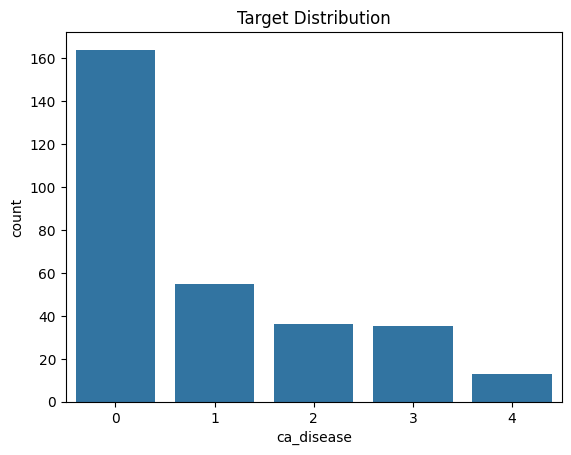

In [ ]:
# Plot the distribution of the target variable
sns.countplot(x='ca_disease', data=df)
plt.title('Target Distribution')
plt.show()

In [ ]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
rest_blood_press       0
cholesterol            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exer_ind_angina        0
st_depression          0
st_slope               0
num_major_vessels      0
thallium_scint         0
ca_disease             0
dtype: int64

# Machine learning models

## Models we will use:

* **Decision Tree** 
* **Random Forest**
* **XGBoost**
* **Logistic Regression**
* **Ada Boost**
* **LGBM**
* **ANN**


*Spitting The Data*

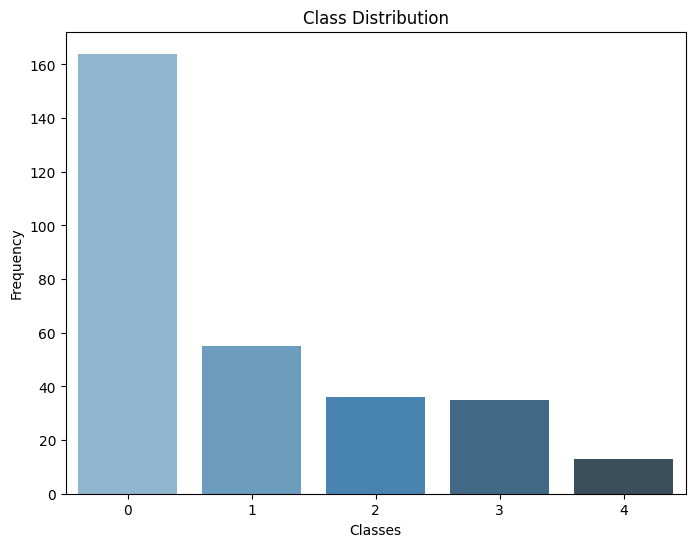

ca_disease
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [ ]:
# Count the occurrences of each class
class_counts = df['ca_disease'].value_counts()

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

# Print the class distribution
print(class_counts)

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the target and features
X = df.drop('ca_disease', axis=1)
y = df['ca_disease']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(y_resampled.value_counts())

ca_disease
0    164
2    164
1    164
3    164
4    164
Name: count, dtype: int64


In [ ]:
df.to_csv('Heart_cleaned_data.csv',index=False)

df = pd.read_csv('Heart_cleaned_data.csv')
df

,age,sex,chest_pain_type,rest_blood_press,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exer_ind_angina,st_depression,st_slope,num_major_vessels,thallium_scint,ca_disease
0,63,1,1.5,145.0,233.0,0.0,2,150.0,0,2.3,3,0,1,0
1,67,1,4.0,160.0,286.0,0.0,2,108.0,1,1.5,2,3,0,2
2,67,1,4.0,120.0,229.0,0.0,2,129.0,1,2.6,2,2,2,1
3,37,1,3.0,130.0,250.0,0.0,0,187.0,0,3.5,3,0,0,0
4,41,0,2.0,130.0,204.0,0.0,2,172.0,0,1.4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1.5,110.0,264.0,0.0,0,132.0,0,1.2,2,0,2,1
299,68,1,4.0,144.0,193.0,0.0,0,141.0,0,3.4,2,2,2,2
300,57,1,4.0,130.0,131.0,0.0,0,115.0,1,1.2,2,1,2,3
301,57,0,2.0,130.0,236.0,0.0,2,174.0,0,0.0,2,1,0,1


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,            # Features
    y_resampled,            # Target labels
    test_size=0.3, # Proportion of the dataset to include in the test split
    random_state=11 # Seed for the random number generator
)

# Optionally, print the shapes of the resulting splits
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (574, 13)
y_train shape:  (574,)
X_test shape:  (246, 13)
y_test shape:  (246,)


*Decision Tree*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
dt_model = DecisionTreeClassifier()

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search for the best parameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Decision Tree Parameters:", grid_search.best_params_)

# Final model accuracy
best_dt = grid_search.best_estimator_
print("Decision Tree Accuracy:", best_dt.score(X_test, y_test))


Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.7560975609756098


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initiallizing 
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# # cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction 
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.8292682926829268
train accuracy: 1.0
********************
0.5937704918032788
********************
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        45
           1       0.87      0.60      0.71        57
           2       0.77      0.88      0.82        42
           3       0.85      0.87      0.86        54
           4       0.89      1.00      0.94        48

    accuracy                           0.83       246
   macro avg       0.83      0.84      0.83       246
weighted avg       0.83      0.83      0.82       246

********************
82.93% Accurate


In [ ]:
from xgboost import XGBClassifier
# Initialize the XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)


train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

#  prediction Summary 
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
XGB_SC = accuracy_score(test_prediction,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

********************
test accuracy: 0.8536585365853658
train accuracy: 1.0
********************
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        45
           1       0.87      0.70      0.78        57
           2       0.88      0.83      0.85        42
           3       0.83      0.93      0.88        54
           4       0.90      0.98      0.94        48

    accuracy                           0.85       246
   macro avg       0.85      0.86      0.85       246
weighted avg       0.85      0.85      0.85       246

********************
85.37% Accurate
